<a href="https://colab.research.google.com/github/mmorari-cmyk/CURSO_SE.ALES_Y_SISTEMAS/blob/main/SERIE_FOURIER_COMPLETO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

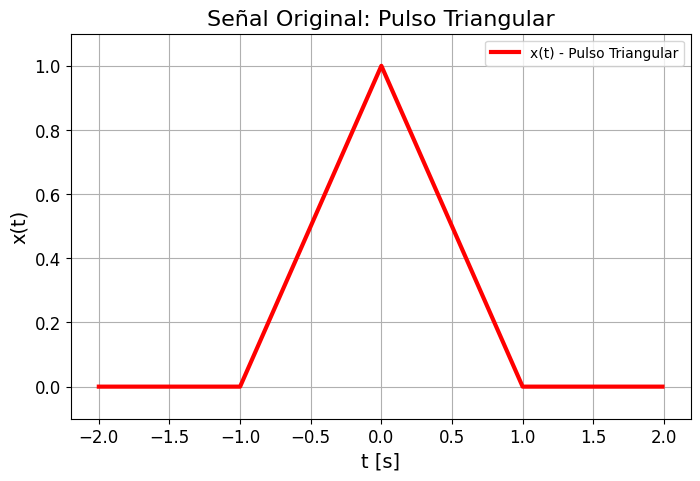

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from ipywidgets import interact, IntSlider
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# --- Configuraciones iniciales de Matplotlib ---
warnings.filterwarnings("ignore")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# --- 1) Definición de la Señal Triangular ---

# Parámetros de la señal
B = 1.0    # Amplitud
T = 4.0    # Período
d1 = 1.0   # Mitad de la base del triángulo

# Parámetros de la simulación
Fs = 100   # Frecuencia de muestreo
tv = np.arange(-T/2, T/2, 1/Fs) # Vector de tiempo para un período
Nm = len(tv) # Número de muestras

# Creación de la señal x(t)
xo = np.zeros_like(tv)

# Rampa ascendente: -d1 <= t <= 0
mask_asc = (tv >= -d1) & (tv <= 0)
xo[mask_asc] = (B / d1) * tv[mask_asc] + B

# Rampa descendente: 0 < t <= d1
mask_desc = (tv > 0) & (tv <= d1)
xo[mask_desc] = (-B / d1) * tv[mask_desc] + B

# --- Graficar la señal original ---
plt.figure(figsize=(8, 5))
plt.plot(tv, xo, 'r', linewidth=3, label='x(t) - Pulso Triangular')
plt.grid(True)
plt.xlabel("t [s]", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.title("Señal Original: Pulso Triangular", fontsize=16)
plt.ylim(-0.1, B + 0.1)
plt.legend()
plt.show()

In [9]:
#4) Reconstrucción de la Señal y Cálculo del Error

# Potencia de la señal original
Px = np.mean(np.abs(xo)**2)

def pltest(Na=1):
    ind = np.arange(N - Na, N + Na + 1)
    xe = phin[:, ind].dot(cn[ind])
    Pc_sum = np.sum(np.abs(cn[ind])**2)
    er = (1 - Pc_sum / Px) * 100 if Px > 0 else 0

    plt.figure(figsize=(10, 6))
    plt.plot(tv, np.real(xe), 'b', label=r'$\hat{x}(t)$ (Reconstruida)')
    plt.plot(tv, xo, 'r', linewidth=2, label='x(t) (Original)')
    plt.title(f'Reconstrucción con $N_a$ = {Na} armónicos\n$E_r$ = {er:.2f}%', fontsize=16)
    plt.xlabel('t [s]', fontsize=14)
    plt.ylabel('x(t)', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.ylim(-0.2, B + 0.2)
    plt.show()

interact(pltest, Na=IntSlider(min=0, max=N, step=1, value=1, description='Armónicos (Na):'));

interactive(children=(IntSlider(value=1, description='Armónicos (Na):', max=10), Output()), _dom_classes=('wid…

In [11]:
# Animación de la Reconstrucción de la Señal

fig_recon_anim, ax_recon_anim = plt.subplots(figsize=(10, 6))

def update_recon(Na):
    ax_recon_anim.clear()
    ind = np.arange(N - Na, N + Na + 1)
    xe = phin[:, ind].dot(cn[ind])
    Pc_sum = np.sum(np.abs(cn[ind])**2)
    er = (1 - Pc_sum / Px) * 100 if Px > 0 else 0

    ax_recon_anim.plot(tv, np.real(xe), 'b', label=r'$\hat{x}(t)$ (Reconstruida)')
    ax_recon_anim.plot(tv, xo, 'r', linewidth=2, label='x(t) (Original)')
    ax_recon_anim.set_title(f'Reconstrucción con $N_a$ = {Na} armónicos | $E_r$ = {er:.2f}%', fontsize=16)
    ax_recon_anim.set_xlabel('t [s]', fontsize=14)
    ax_recon_anim.set_ylabel('x(t)', fontsize=14)
    ax_recon_anim.grid(True)
    ax_recon_anim.legend(loc='upper right')
    ax_recon_anim.set_ylim(-0.2, B + 0.2)

anim_recon = FuncAnimation(fig_recon_anim, update_recon, frames=range(N + 1), blit=False, interval=300)
plt.close(fig_recon_anim)
HTML(anim_recon.to_jshtml())

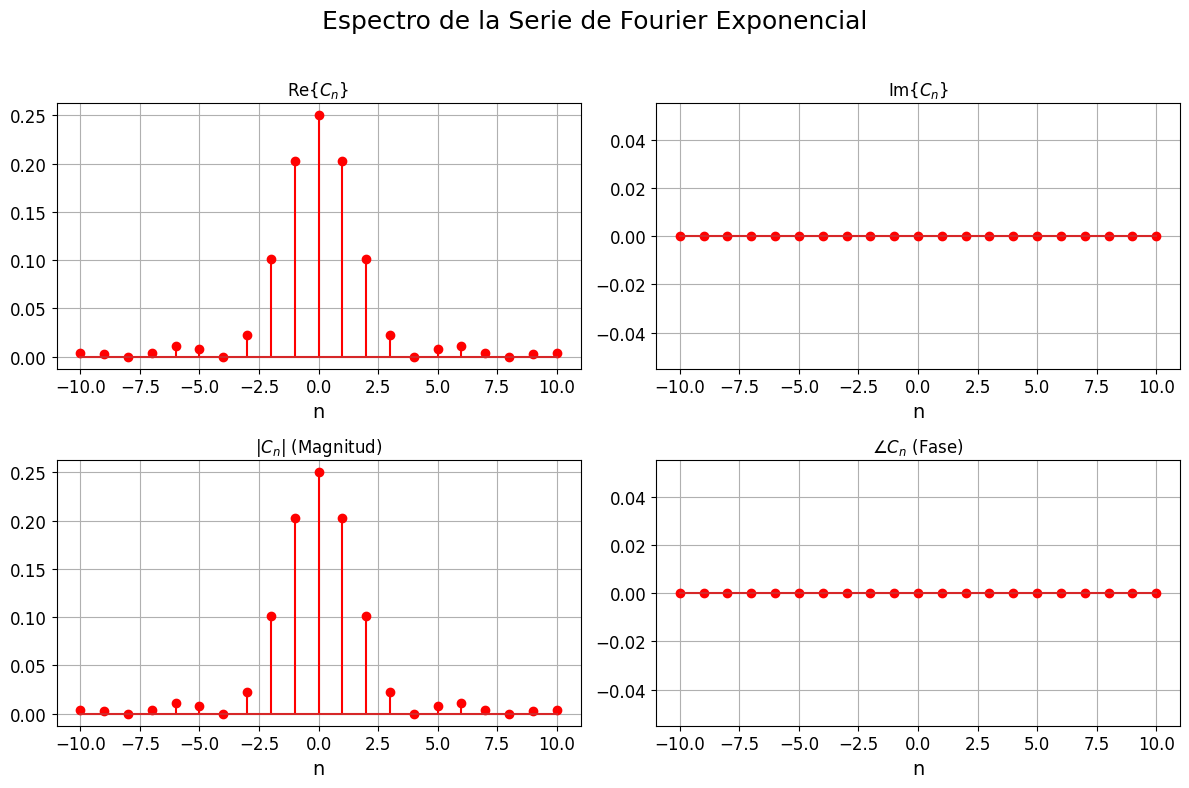

In [8]:
#3) Cálculo y Gráfica del Espectro

# Rango de armónicos para el cálculo
nv = np.arange(-N, N + 1)
cn = np.zeros(2 * N + 1, dtype=np.complex128)

# Fórmula para los coeficientes c_n (excluyendo n=0)
n_nonzero = nv[nv != 0]
cn_nonzero = (B * T / ((np.pi**2) * d1 * (n_nonzero**2))) * (np.sin(np.pi * n_nonzero * d1 / T)**2)
cn[nv != 0] = cn_nonzero

# Calcular c_0 por separado
c0 = (B * d1) / T
cn[N] = c0  # El índice para n=0 es N

# Graficar el espectro
fig_spec, axes_spec = plt.subplots(2, 2, figsize=(12, 8))
fig_spec.suptitle("Espectro de la Serie de Fourier Exponencial", fontsize=18)

# Parte Real, Imaginaria, Magnitud y Fase
axes_spec[0, 0].stem(nv, np.real(cn), 'r'); axes_spec[0, 0].set_title('Re{$C_n$}'); axes_spec[0,0].grid(True)
axes_spec[0, 1].stem(nv, np.imag(cn), 'r'); axes_spec[0, 1].set_title('Im{$C_n$}'); axes_spec[0,1].grid(True)
axes_spec[1, 0].stem(nv, np.abs(cn), 'r'); axes_spec[1, 0].set_title('|$C_n$| (Magnitud)'); axes_spec[1,0].grid(True)
axes_spec[1, 1].stem(nv, np.angle(cn), 'r'); axes_spec[1, 1].set_title('∠$C_n$ (Fase)'); axes_spec[1,1].grid(True)

for ax in axes_spec.flat:
    ax.set_xlabel('n')

fig_spec.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [12]:
#  Animación Completa y Detallada de la Reconstrucción

fig_anim_full, ax = plt.subplots(2, 2, figsize=(14, 8))
gs = ax[0, 0].get_gridspec()
for a in ax[1, :]: a.remove()
ax_bottom = fig_anim_full.add_subplot(gs[1, :])

def update_full_animation(Na):
    # Limpiar todos los ejes
    ax[0, 0].clear(); ax[0, 1].clear(); ax_bottom.clear()

    # Espectro
    ind = np.arange(N - Na, N + Na + 1)
    ax[0, 0].stem(nv, np.abs(cn), linefmt='b-', markerfmt='bo', basefmt=' ', label='No usados')
    ax[0, 0].stem(nv[ind], np.abs(cn[ind]), linefmt='r-', markerfmt='ro', basefmt=' ', label='Usados')
    ax[0, 0].set_ylabel('$|c_n|$'); ax[0, 0].set_xlabel('n [rad/s]'); ax[0, 0].set_title('Magnitud del Espectro')
    ax[0, 0].grid(True); ax[0, 0].legend()

    # Componentes Espectrales
    ce = phin[:, ind] * cn[ind]
    ax[0, 1].plot(tv, np.real(ce))
    ax[0, 1].set_xlabel('t [s]'); ax[0, 1].set_ylabel(r'$Re\{c_n \phi_n(t)\}$'); ax[0, 1].set_title('Componentes Reales')
    ax[0, 1].grid(True)

    # Reconstrucción y Error
    xe = phin[:, ind].dot(cn[ind])
    et = xo - np.real(xe)
    Pc_sum = np.sum(np.abs(cn[ind])**2)
    er = (1 - Pc_sum / Px) * 100 if Px > 0 else 0

    ax_bottom.plot(tv, xo, 'r', linewidth=2, label='$x(t)$ (Original)')
    ax_bottom.plot(tv, np.real(xe), 'b', label=r'$\hat{x}(t)$ (Reconstruida)')
    ax_bottom.plot(tv, et, 'g', label='$e(t)$ (Error)')
    ax_bottom.set_title(f'$E_r = {er:.2f}$% para $N_a = {Na}$', fontsize=14)
    ax_bottom.set_xlabel('t [s]'); ax_bottom.set_ylabel('x(t)')
    ax_bottom.legend(loc='upper right'); ax_bottom.grid(True)
    ax_bottom.set_ylim(-0.2, B + 0.2)

    fig_anim_full.tight_layout()

anim_full = FuncAnimation(fig_anim_full, update_full_animation, frames=range(N + 1), blit=False, interval=400)
plt.close(fig_anim_full)
HTML(anim_full.to_jshtml())